<a href="https://colab.research.google.com/gist/ardabulut46/1be8b7f15e961651d2e4e85c863678ba/hypertension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/sample_data/hypertension_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [ ]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [ ]:
df.isnull().sum()

,0
Age,0
Salt_Intake,0
Stress_Score,0
BP_History,0
Sleep_Duration,0
BMI,0
Medication,799
Family_History,0
Exercise_Level,0
Smoking_Status,0


In [ ]:
df['Medication'].fillna('No Medication', inplace=True)

/tmp/ipython-input-9-1565296090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medication'].fillna('No Medication', inplace=True)


In [ ]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


In [ ]:
df['Has_Hypertension'].value_counts()

,count
Has_Hypertension,
Yes,1032
No,953


In [ ]:
df['Smoking_Status'].value_counts()

,count
Smoking_Status,
Non-Smoker,1417
Smoker,568


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Has_Hypertension', ylabel='count'>

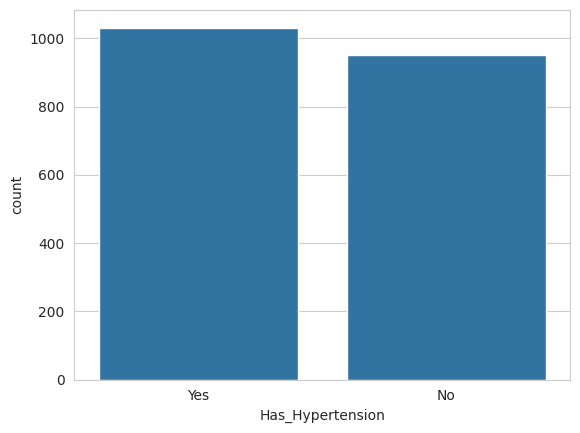

In [ ]:
sns.set_style('whitegrid')


sns.countplot(x='Has_Hypertension', data=df)

Text(0.5, 1.0, 'Hypertension status by smoking status')

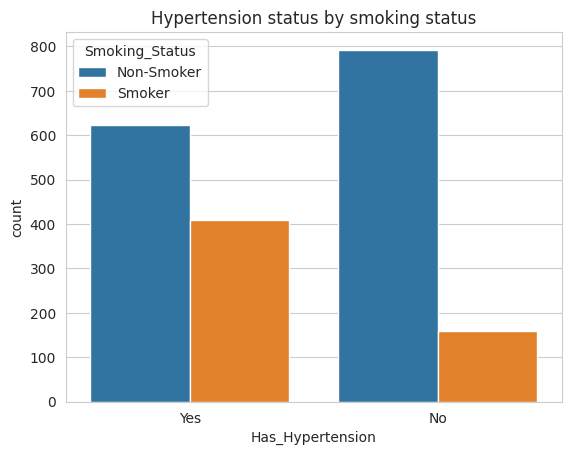

In [ ]:
sns.countplot(x='Has_Hypertension',hue='Smoking_Status',data=df)

plt.title('Hypertension status by smoking status')

Text(0.5, 1.0, 'Age distribution by Hypertension Status ')

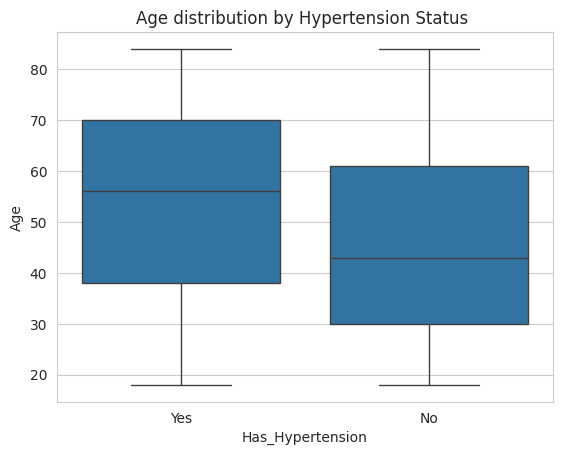

In [ ]:
sns.boxplot(x='Has_Hypertension',y='Age',data=df)

plt.title('Age distribution by Hypertension Status')

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

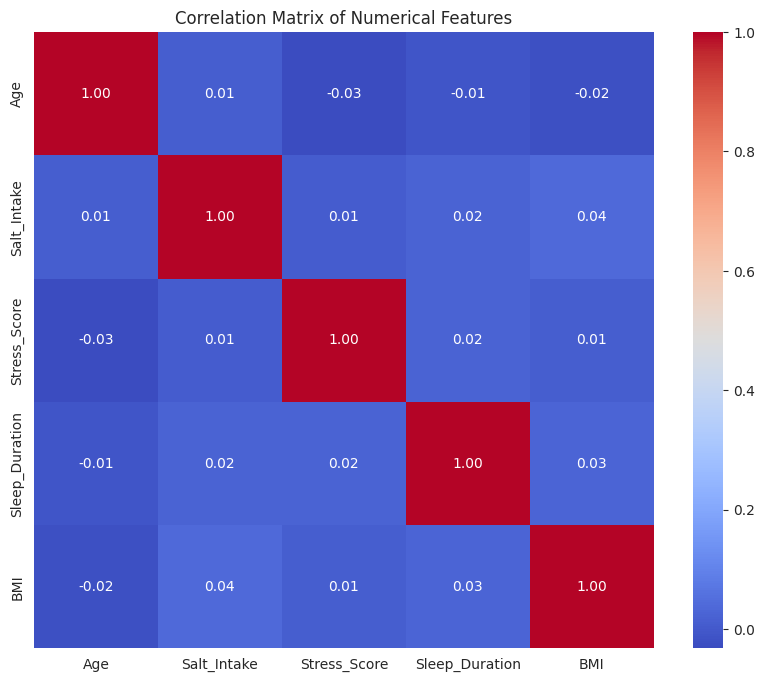

In [ ]:
numerical_df = df.select_dtypes(include=['int64','float64'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt='.2f')

plt.title('Correlation Matrix of Numerical Features')

In [ ]:
binary_map = {'Yes':1, 'No':0}

In [ ]:
df['Has_Hypertension'] = df['Has_Hypertension'].map(binary_map)

df['Family_History'] = df['Family_History'].map(binary_map)

smoking_map = {'Smoker':1,'Non-Smoker':0}
df['Smoking_Status'] = df['Smoking_Status'].map(smoking_map)

In [ ]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,No Medication,1,Low,0,1
1,32,11.7,10,Normal,5.4,23.4,No Medication,0,Low,0,0
2,78,9.5,3,Normal,7.1,18.7,No Medication,0,Moderate,0,0
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,0,Low,0,1
4,41,9.8,1,Prehypertension,5.8,16.2,Other,0,Moderate,0,0


In [ ]:
columns_to_encode = ['BP_History','Exercise_Level','Medication']

one_hot_encoded_df = pd.get_dummies(df, columns = columns_to_encode)

print('new dataframe shape: ',one_hot_encoded_df.shape)

one_hot_encoded_df.head()
one_hot_encoded_df.info()

new dataframe shape:  (1985, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1985 non-null   int64  
 1   Salt_Intake                 1985 non-null   float64
 2   Stress_Score                1985 non-null   int64  
 3   Sleep_Duration              1985 non-null   float64
 4   BMI                         1985 non-null   float64
 5   Family_History              1985 non-null   int64  
 6   Smoking_Status              1985 non-null   int64  
 7   Has_Hypertension            1985 non-null   int64  
 8   BP_History_Hypertension     1985 non-null   bool   
 9   BP_History_Normal           1985 non-null   bool   
 10  BP_History_Prehypertension  1985 non-null   bool   
 11  Exercise_Level_High         1985 non-null   bool   
 12  Exercise_Level_Low          1985 non-null   bool   
 13  

In [ ]:
X = one_hot_encoded_df.drop('Has_Hypertension',axis=1)

y = one_hot_encoded_df['Has_Hypertension']

print('Shape of features (X)',X.shape)
print('Shape of features (y)',y.shape)

Shape of features (X) (1985, 18)
Shape of features (y) (1985,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)

Shape of X_train (1588, 18)
Shape of X_test (397, 18)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

log_reg_model = LogisticRegression(max_iter=1000)

print('Training the model...')
log_reg_model.fit(X_train,y_train)
print('Model training complete!')

y_pred = log_reg_model.predict(X_test)

print('\n--- Model Evaluation ---')
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'(This means the model correctly predicted the outcome {accuracy:.2%} of the time on the test data)')

print('\nClassification Report')

report = classification_report(y_test,y_pred,target_names=['No Hypertension(0)','Has Hypertension(1)'])
print(report)

Training the model...
Model training complete!

--- Model Evaluation ---
Accuracy: 0.88
(This means the model correctly predicted the outcome 88.41% of the time on the test data)

Classification Report
                     precision    recall  f1-score   support

 No Hypertension(0)       0.87      0.90      0.88       192
Has Hypertension(1)       0.90      0.87      0.89       205

           accuracy                           0.88       397
          macro avg       0.88      0.88      0.88       397
       weighted avg       0.88      0.88      0.88       397



Text(0, 0.5, 'Feature')

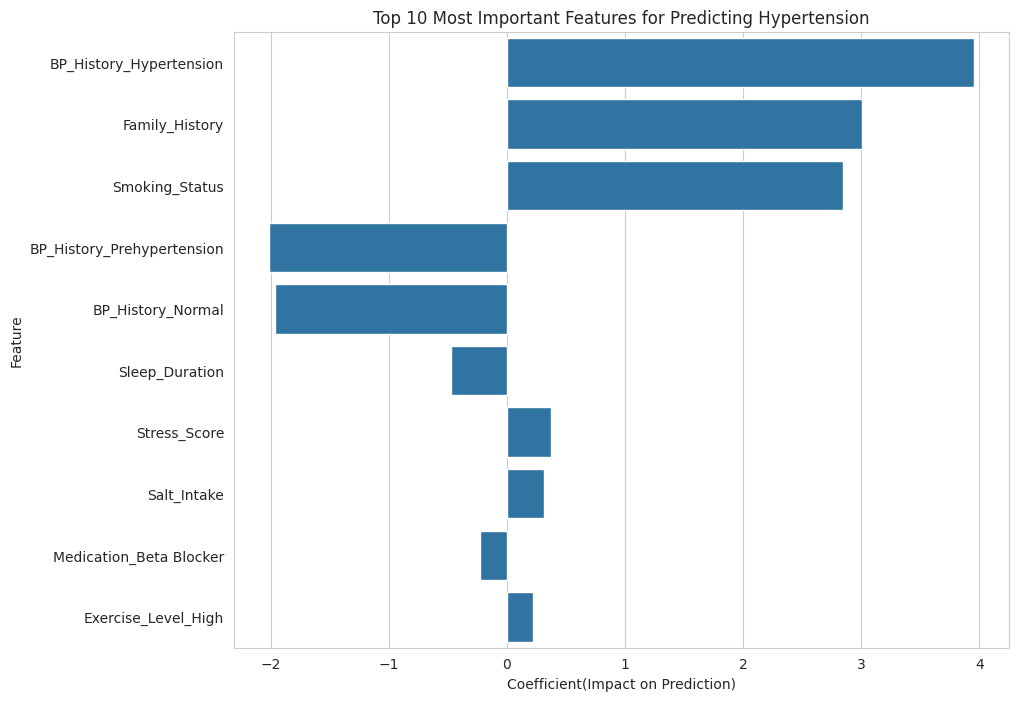

In [ ]:
coefficients = log_reg_model.coef_[0]

feature_importance = pd.DataFrame({'Feature':X.columns,'Coefficient':coefficients})

feature_importance['abs_Coefficient'] = feature_importance['Coefficient'].abs()

feature_importance = feature_importance.sort_values(by='abs_Coefficient',ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient',y='Feature',data=feature_importance.head(10))
plt.title('Top 10 Most Important Features for Predicting Hypertension')
plt.xlabel('Coefficient(Impact on Prediction)')
plt.ylabel('Feature')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

print('Training the Random Forest model...')
rf_model.fit(X_train,y_train)
print('Model training complete!')

y_pred_rf = rf_model.predict(X_test)
print('\n--- Random Forest Model Evaluation ---')

accuracy_rf = accuracy_score(y_test,y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f} {accuracy_rf:.2%}')

print("\nClassification Report: ")
print(classification_report(y_test,y_pred_rf,target_names=['No Hypertension(0)', 'Has Hypertension(1)']))


Training the Random Forest model...
Model training complete!

--- Random Forest Model Evaluation ---
Random Forest Accuracy: 0.95 95.47%

Classification Report: 
                     precision    recall  f1-score   support

 No Hypertension(0)       0.94      0.96      0.95       192
Has Hypertension(1)       0.97      0.95      0.96       205

           accuracy                           0.95       397
          macro avg       0.95      0.95      0.95       397
       weighted avg       0.95      0.95      0.95       397



In [ ]:
importances = rf_model.feature_importances_

Text(0, 0.5, 'Feature')

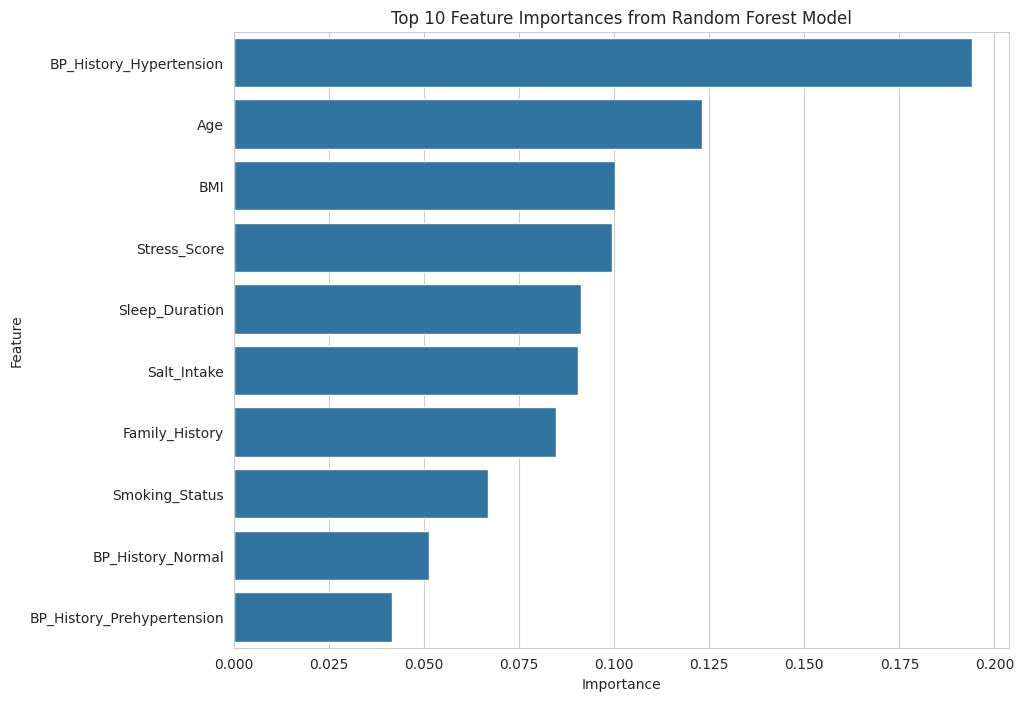

In [ ]:
rf_feature_importance = pd.DataFrame({'Feature':X.columns,'Importance':importances})

rf_feature_importance = rf_feature_importance.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10,8))

sns.barplot(x='Importance',y='Feature',data=rf_feature_importance.head(10))
plt.title('Top 10 Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [ ]:
print('arda')